In [15]:
export = True

In [1]:
# parse
import re
loss_regex = r"TrainLoss: (\d+\.\d+)"
tp_regex = r": (\d+\.\d) img\/sec"
comp_regex = r"Bandwidth savings: from \d+ to \d+ \((\d+\.\d+)x\)"
gpu_regex = r"Number of GPUs: (\d)"

def parse(file, regex):
    nums = []
    for line in open(file, "r").readlines():
        matches = re.search(regex, line)
        if matches:
            nums.append(float(matches.group(1)))
    return nums

def parse_loss(file):
    return parse(file, loss_regex)

def parse_tp(file):
    return parse(file, tp_regex)

def parse_comp_ratio(file):
    return parse(file, comp_regex)

def parse_num_gpu(file):
    return parse(file, gpu_regex)

In [4]:
from os import listdir
import pandas as pd

data = {
    "loss": [],
    "tp": [],
    "name": [],
    "gpu": []
}

for name in listdir("benchmarks"):
    file = f"benchmarks/{name}"
    attrs = {}
    data["loss"].append(parse_loss(file))
    data["tp"].append(parse_tp(file))
    
    comp = parse_comp_ratio(file)
    if len(comp) > 0:
        name += f" (ratio: {comp[0]:.0f})"
    
    data["name"].append(name)

    gpu = parse_num_gpu(file)
    if len(gpu) > 0:
        data["gpu"].append(gpu[0])
    else:
        data["gpu"].append(None)
    

df = pd.DataFrame(data)
df

,loss,tp,name,gpu
0,"[6.873844, 4.243429, 4.125849, 4.059104, 4.065...","[224.1, 223.3, 222.0, 223.7, 222.5, 222.7, 221...","allreduce, 2 GPUs",2.0
1,"[7.138481, 3.765308, 3.547871, 3.511544, 3.456...","[110.0, 109.8, 110.0, 109.0, 109.5, 108.8, 109...",allreduce,1.0
2,"[7.078182, 6.481041, 6.078959, 5.546234, 5.198...","[108.3, 106.8, 106.6, 106.8, 106.2, 105.7, 105...","sketch, 2 GPUs (ratio: 85190)",2.0
3,"[7.181457, 6.497581, 6.217083, 5.945078, 5.313...","[54.1, 52.8, 52.0, 51.5, 51.6, 51.6, 51.4, 51....",sketch (ratio: 85190),1.0


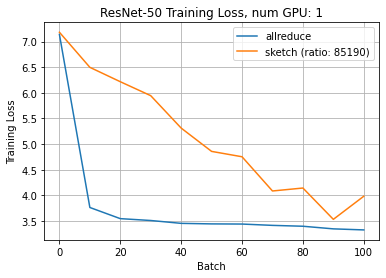

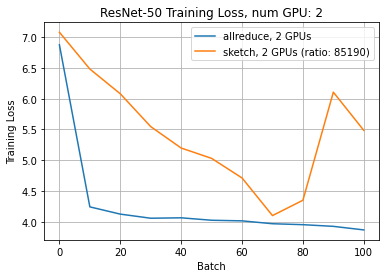

In [19]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 110, 10)
gpus = df["gpu"].unique()
gpus.sort()
for num_gpu in gpus:
    for i, row in df[df["gpu"]==num_gpu].iterrows():
        plt.plot(t, row["loss"], label=row["name"])
    plt.title(f"ResNet-50 Training Loss, num GPU: {num_gpu:.0f}")
    plt.xlabel("Batch")
    plt.ylabel("Training Loss")
    plt.grid(True)
    plt.legend()
    if export: plt.savefig(f"{num_gpu:.0f}-loss.svg")
    plt.show()

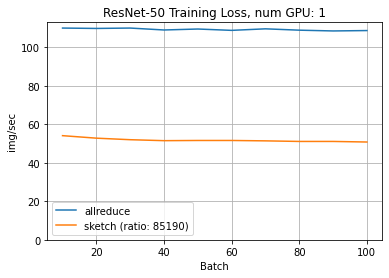

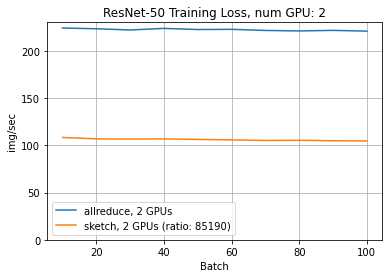

In [20]:
t = np.arange(10, 110, 10)

import numpy as np
import matplotlib.pyplot as plt

gpus = df["gpu"].unique()
gpus.sort()
for num_gpu in gpus:
    for i, row in df[df["gpu"]==num_gpu].iterrows():
        plt.plot(t, row["tp"], label=row["name"])
    plt.title(f"ResNet-50 Training Loss, num GPU: {num_gpu:.0f}")
    plt.xlabel("Batch")
    plt.ylabel("img/sec")
    plt.grid(True)
    plt.legend()
    plt.ylim(bottom=0)
    if export: plt.savefig(f"{num_gpu:.0f}-tp.svg")
    plt.show()